## Libraries

In [89]:
import os
import random
import shutil
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Set Path

In [55]:
cat_folder = 'PetImages/Cat/'
dog_folder = 'PetImages/Dog/'

In [56]:
train_folder = 'train_folder/'
test_folder = 'test_folder/'

In [57]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [58]:
def create_folder_structure(root_folder, classes):
    for class_name in classes:
        class_folder = os.path.join(root_folder, class_name)
        os.makedirs(class_folder, exist_ok=True)

In [59]:
cat_images = os.listdir(cat_folder)
random.shuffle(cat_images)
cat_train_count = int(len(cat_images) * 0.8)

In [60]:
create_folder_structure(train_folder, ['cat', 'dog'])
create_folder_structure(test_folder, ['cat', 'dog'])

## Split Data

### cat train folder

In [ ]:

for image in cat_images[:cat_train_count]:
    src_path = os.path.join(cat_folder, image)
    dest_path = os.path.join(train_folder, 'cat', image)
    try:
        with Image.open(src_path) as img:
            img.save(dest_path)
    except (IOError, OSError):
        pass


### cat test folder

In [ ]:

for image in cat_images[cat_train_count:]:
    src_path = os.path.join(cat_folder, image)
    dest_path = os.path.join(test_folder, 'cat', image)
    try:
        with Image.open(src_path) as img:
            img.save(dest_path)
    except (IOError, OSError):
        pass

In [ ]:
dog_images = os.listdir(dog_folder)
random.shuffle(dog_images)
dog_train_count = int(len(dog_images) * 0.8)

### dog train folder

In [ ]:
for image in dog_images[:dog_train_count]:
    src_path = os.path.join(dog_folder, image)
    dest_path = os.path.join(train_folder, 'dog', image)
    try:
        with Image.open(src_path) as img:
            img.save(dest_path)
    except (IOError, OSError):
        pass

### dog test folder

In [ ]:
for image in dog_images[dog_train_count:]:
    src_path = os.path.join(dog_folder, image)
    dest_path = os.path.join(test_folder, 'dog', image)
    try:
        with Image.open(src_path) as img:
            img.save(dest_path)
    except (IOError, OSError):
        pass

## Train Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 19954 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 4985 images belonging to 2 classes.


In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator)//2,
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)//2
)

Epoch 1/5


C:\Users\K LOKESH\AppData\Local\Temp\ipykernel_16620\835117286.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


499/499 [==============================] - 322s 644ms/step - loss: 0.6795 - accuracy: 0.5765 - val_loss: 0.6711 - val_accuracy: 0.6036
Epoch 2/5
499/499 [==============================] - 320s 642ms/step - loss: 0.6776 - accuracy: 0.5822 - val_loss: 0.6540 - val_accuracy: 0.6124
Epoch 3/5
499/499 [==============================] - 357s 716ms/step - loss: 0.6595 - accuracy: 0.6040 - val_loss: 0.6249 - val_accuracy: 0.6560
Epoch 4/5
499/499 [==============================] - 391s 783ms/step - loss: 0.6489 - accuracy: 0.6326 - val_loss: 0.6345 - val_accuracy: 0.6464
Epoch 5/5
499/499 [==============================] - 358s 718ms/step - loss: 0.6348 - accuracy: 0.6431 - val_loss: 0.5953 - val_accuracy: 0.6836


### Validation

### plotting img.

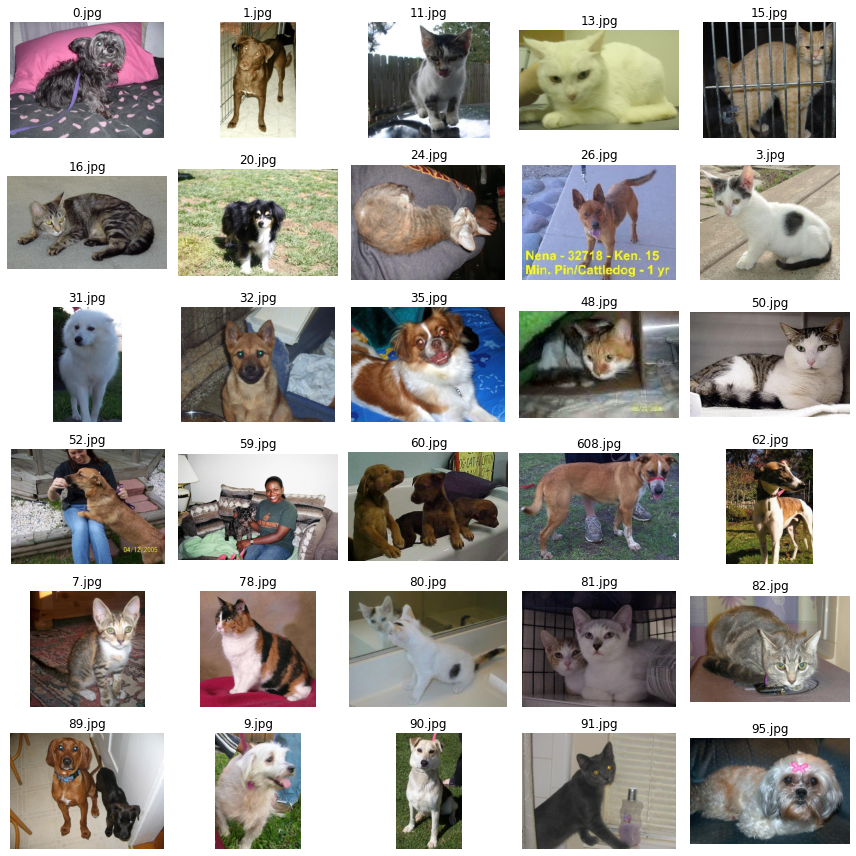

In [80]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_files = [file for file in os.listdir('sample_validation') if file.lower().endswith(('.jpg'))]

fig, axes = plt.subplots(6, 5, figsize=(12, 12))
for i, image_file in enumerate(image_files):
    image_path = os.path.join('sample_validation', image_file)
    img = imread(image_path)
    ax = axes[i//5, i%5]
    ax.imshow(img)
    ax.set_title(image_file)
    ax.axis('off')

plt.tight_layout()
plt.show()


### classifying img.

In [91]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
output = {}
t = 0
for image_file in image_files:
    img = load_img(f'sample_validation/{image_file}', target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    probabilities = model.predict(img_array)
    output[image_file] = 'dog' if probabilities[0][0]>0.5 else 'cat'
print([output[img] for img in output.keys()])


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 41ms/step
['dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog']
